Read the data

In [2]:
import pandas as pd

# Load the dataset
file_path = 'IMDB.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
data.head()


,Name,Year,Episodes,Type,Rating,Image-src,Description,Name-href
0,1. Breaking Bad,2008–2013,62 eps,TV-MA,9.5,https://m.media-amazon.com/images/M/MV5BYmQ4YW...,A chemistry teacher diagnosed with inoperable ...,https://www.imdb.com/title/tt0903747/?ref_=cht...
1,2. Planet Earth II,2016,6 eps,TV-G,9.5,https://m.media-amazon.com/images/M/MV5BMGZmYm...,David Attenborough returns with a new wildlife...,https://www.imdb.com/title/tt5491994/?ref_=cht...
2,3. Planet Earth,2006,11 eps,TV-PG,9.4,https://m.media-amazon.com/images/M/MV5BMzMyYj...,A documentary series on the wildlife found on ...,https://www.imdb.com/title/tt0795176/?ref_=cht...
3,4. Band of Brothers,2001,10 eps,TV-MA,9.4,https://m.media-amazon.com/images/M/MV5BMTI3OD...,The story of Easy Company of the U.S. Army 101...,https://www.imdb.com/title/tt0185906/?ref_=cht...
4,5. Chernobyl,2019,5 eps,TV-MA,9.4,https://m.media-amazon.com/images/M/MV5BNTdkN2...,"In April 1986, an explosion at the Chernobyl n...",https://www.imdb.com/title/tt7366338/?ref_=cht...


Checking for missing values

In [3]:

missing_values = data.isnull().sum()

# Preprocessing 'Episodes' column: Extracting numerical part
# Assuming the format is always "<number> eps"
data['Episodes'] = data['Episodes'].str.extract('(\d+)').astype(float)

missing_values, data[['Episodes', 'Rating']].head()


(Name           0
 Year           0
 Episodes       0
 Type           5
 Rating         0
 Image-src      0
 Description    0
 Name-href      0
 dtype: int64,
    Episodes  Rating
 0      62.0     9.5
 1       6.0     9.5
 2      11.0     9.4
 3      10.0     9.4
 4       5.0     9.4)

#Hierarchical Clustering:

* Choose an appropriate linkage method and distance metric.
* Perform the clustering.


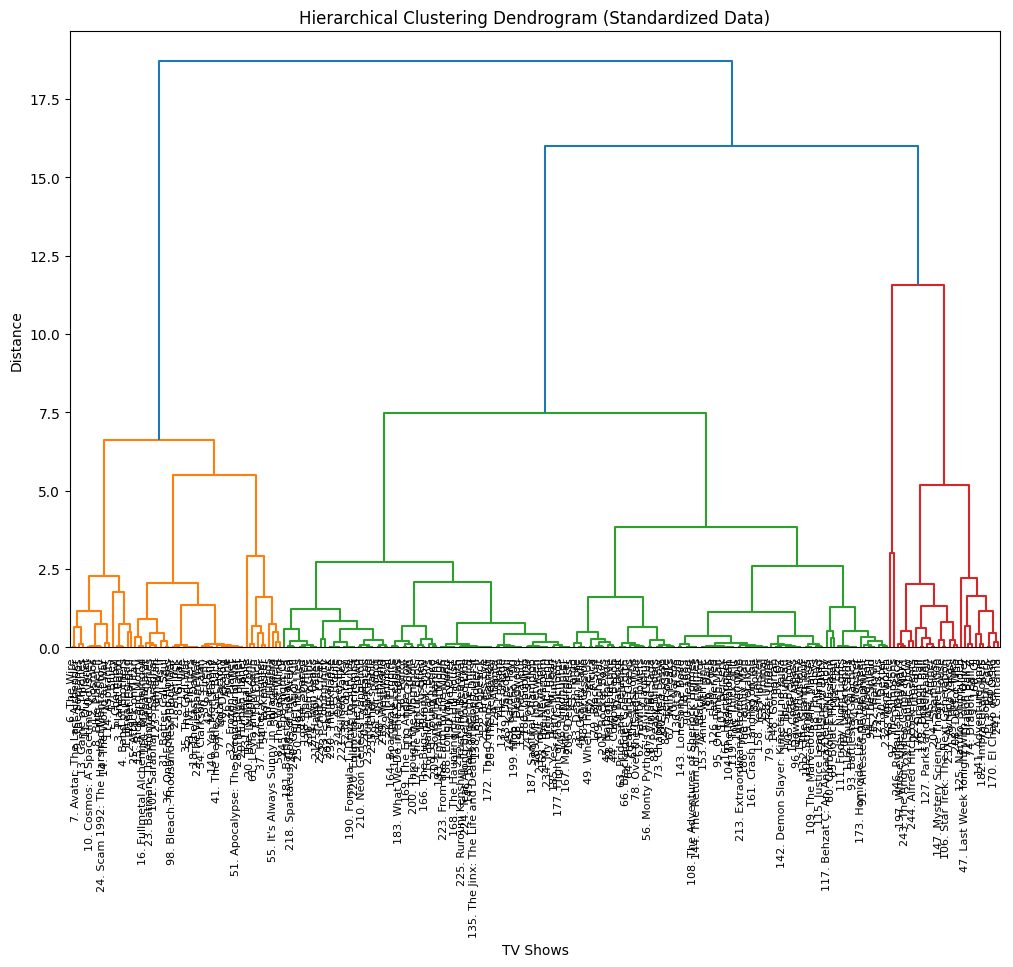

In [5]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame with 'Episodes' and 'Rating' columns

# Standardizing the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[['Episodes', 'Rating']])

# Performing hierarchical clustering
Z_scaled = linkage(data_scaled, 'ward')

# Plotting the dendrogram
plt.figure(figsize=(12, 8))
plt.title('Hierarchical Clustering Dendrogram (Standardized Data)')
dendrogram(Z_scaled, labels=data['Name'].values, leaf_rotation=90, leaf_font_size=8)
plt.xlabel('TV Shows')
plt.ylabel('Distance')
plt.show()


# Interpret the Dendrogram
* Identify Clusters: Look at the dendrogram and decide on a
reasonable distance threshold to 'cut' the dendrogram, which will define your clusters.
* Analyze Cluster Characteristics: For each cluster, analyze the characteristics of the TV shows within it. This can give insights into what features are driving the clustering.

In [6]:
from scipy.cluster.hierarchy import fcluster

# Choosing a distance threshold for cutting the dendrogram
# This is somewhat arbitrary and should ideally be based on domain knowledge or dendrogram analysis
distance_threshold = 5

# Extracting clusters
clusters = fcluster(Z_scaled, distance_threshold, criterion='distance')

# Adding cluster labels to the original data
data['Cluster'] = clusters

# Displaying the first few rows with cluster labels
clustered_data_head = data.head()

# Counting the number of TV shows in each cluster
cluster_counts = data['Cluster'].value_counts()

clustered_data_head, cluster_counts


(                  Name       Year  Episodes   Type  Rating  \
 0      1. Breaking Bad  2008–2013      62.0  TV-MA     9.5   
 1   2. Planet Earth II       2016       6.0   TV-G     9.5   
 2      3. Planet Earth       2006      11.0  TV-PG     9.4   
 3  4. Band of Brothers       2001      10.0  TV-MA     9.4   
 4         5. Chernobyl       2019       5.0  TV-MA     9.4   
 
                                            Image-src  \
 0  https://m.media-amazon.com/images/M/MV5BYmQ4YW...   
 1  https://m.media-amazon.com/images/M/MV5BMGZmYm...   
 2  https://m.media-amazon.com/images/M/MV5BMzMyYj...   
 3  https://m.media-amazon.com/images/M/MV5BMTI3OD...   
 4  https://m.media-amazon.com/images/M/MV5BNTdkN2...   
 
                                          Description  \
 0  A chemistry teacher diagnosed with inoperable ...   
 1  David Attenborough returns with a new wildlife...   
 2  A documentary series on the wildlife found on ...   
 3  The story of Easy Company of the U.S. Army 1

#Genre (Type) Distribution Within Each Cluster
The table shows the distribution of TV show types (like 'TV-MA', 'TV-PG', etc.) within each cluster, expressed as a percentage of the total number of shows in that cluster. Here are some key observations:

* Cluster 1: A diverse mix, with 'TV-MA', 'TV-PG', and 'TV-14' being the most common.
* Cluster 2: Dominated by 'TV-MA' and 'TV-14' shows.
* Cluster 3: A significant presence of 'TV-14' and 'TV-PG' shows.
* Cluster 4: Mostly 'TV-MA' and 'TV-14'.
* Cluster 5: Predominantly 'TV-MA' and 'TV-14', with some 'TV-PG'.
* Cluster 6: Exclusively 'TV-MA'.
* Cluster 7: Largely 'TV-MA' and 'TV-14'.
* Cluster 8: A mix, but mainly 'TV-MA' and 'TV-14', with a notable presence of 'Not Rated'.

In [7]:
# Genre (Type) distribution within each cluster
type_distribution_per_cluster = data.groupby('Cluster')['Type'].value_counts(normalize=True).unstack().fillna(0)

type_distribution_per_cluster


Type,Not Rated,PG-13,TV-14,TV-G,TV-MA,TV-PG,TV-Y,TV-Y7,TV-Y7-FV
Cluster,,,,,,,,,
1,0.000000,0.000000,0.117647,0.117647,0.352941,0.294118,0.058824,0.000000,0.058824
2,0.000000,0.033333,0.300000,0.066667,0.400000,0.200000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.500000,0.000000,0.200000,0.300000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.337838,0.013514,0.472973,0.175676,0.000000,0.000000,0.000000
5,0.023529,0.000000,0.341176,0.000000,0.447059,0.164706,0.000000,0.011765,0.011765
6,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.250000,0.000000,0.500000,0.250000,0.000000,0.000000,0.000000
8,0.090909,0.000000,0.272727,0.000000,0.454545,0.181818,0.000000,0.000000,0.000000
